<h1><center>Prediction of Vietnam Future Economic Development</center></h1>

<h4><center>TRUNG QUOC NGO<center></h4>


## PART 1 - MAPPING

### Loading necessary libraries

In [324]:
import numpy as np
import pandas as pd
import seaborn as sns
import json

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests 
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium

print('Libraries imported.')

Libraries imported.


### Displaying provincial population

In [327]:
neighborhoods=pd.read_csv("https://raw.githubusercontent.com/quitribo/CAPSTONE/master/provinces.csv")
neighborhoods

,name,latitude,longitude,population
0,An Giang,19.631414,105.578154,1908352
1,Ba Ria-Vung Tau,8.682279,106.607283,1148313
2,Bac Giang,10.000898,105.750951,1803950
3,Bac Kan,22.543109,103.889887,313905
4,Bac Lieu,9.294141,105.727764,907236
...,...,...,...,...
59,Tuyen Quang,22.144131,105.272775,784811
60,Vinh Long,20.491213,106.009549,1022791
61,Vinh Phuc,21.375251,105.542560,1151154
62,Yen Bai,21.755850,104.827684,821030


In [326]:
address = 'Da Nang, VN'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Da Nang are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Da Nang are 16.068, 108.212.


In [5]:
# create map of New York using latitude and longitude values
map_danang = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, name in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_danang)  
    
map_danang

In [6]:
vietnam_geo = "https://raw.githubusercontent.com/Vizzuality/growasia_calculator/master/public/vietnam.geojson"

In [7]:
world_map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='Mapbox Bright')

In [8]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=vietnam_geo,
    data=neighborhoods,
    columns=['name', 'population'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Provincial population in Vietnam'
)

# display map
world_map

In [9]:
years = list(map(str, range(2009, 2020)))
years

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

## PART 2 - ANALYSIS

**1. MONETARY POLICIES**

In [328]:
monpol = pd.read_csv("https://raw.githubusercontent.com/quitribo/CAPSTONE/master/monpol.csv")
monpol.set_index('indicators', inplace=True)
monpol.index.name = None

monpol.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Profit_tax,21,12,17,12,17,17,14,14,13,13,13
Inflation,7,9,19,9,7,4,1,3,4,4,3
GDP,106000000000,116000000000,136000000000,156000000000,171000000000,186000000000,193000000000,205000000000,224000000000,245000000000,262000000000
GDP_per_capita,1217,1318,1525,1735,1887,2030,2085,2192,2366,2567,2715


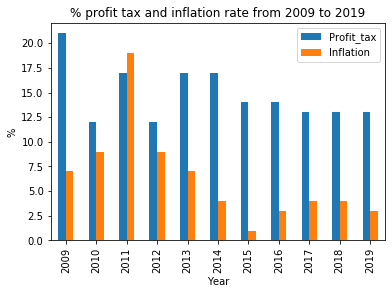

In [329]:
monpol.loc[['Profit_tax','Inflation']].transpose().plot(kind='bar', rot=90)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('% profit tax and inflation rate from 2009 to 2019')

plt.show()

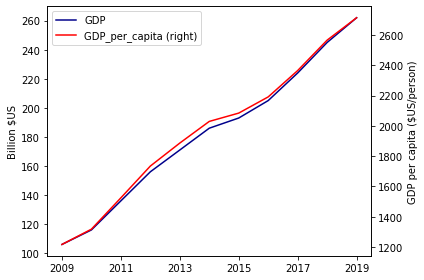

In [330]:
gdp_bil =monpol.loc[['GDP']]/1000000000

df = pd.concat([monpol.loc[['GDP_per_capita']],gdp_bil]).transpose()
df

ax=df.plot(kind='line', y='GDP', color='DarkBlue')
ax2=df.plot(kind='line', y='GDP_per_capita', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('Billion $US')
ax2.set_ylabel('GDP per capita ($US/person)')
plt.tight_layout()
plt.show()

**2. EMPLOYMENT**

In [331]:
emp = pd.read_csv("https://raw.githubusercontent.com/quitribo/CAPSTONE/master/employment.csv")
emp.set_index('indicators', inplace=True)
emp.index.name = None
# take a look at the dataset
emp.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unemployment_%,1.7,1.1,1.0,1.0,1.3,1.3,1.8,1.8,1.9,1.2,2.0
Unemployment_youth_%,4.6,3.6,3.4,4.0,5.0,5.2,6.7,7.2,7.3,4.8,6.9
Employment_to_population_ratio_15+_%,74.5,75.3,75.5,75.4,76.0,76.1,75.8,75.1,74.7,74.7,68.8
Employment_to_population_ratio_15-24_total_%,56.7,56.1,54.4,52.9,54.6,54.6,55.0,52.6,52.3,52.5,50.2
Labor_force_total,50213112.0,51254209.0,52620771.0,53347074.0,54667903.0,55355047.0,55760129.0,55991171.0,56565992.0,56915235.0,57364650.0


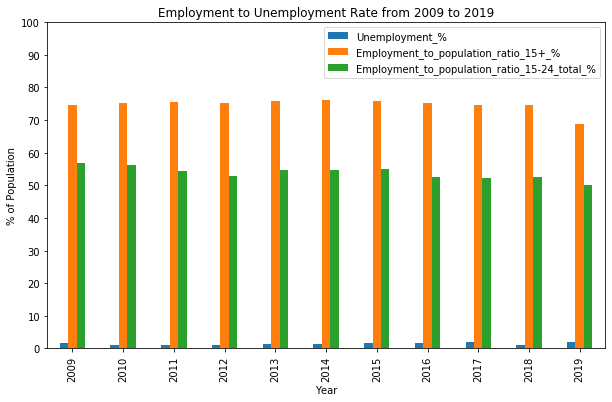

In [332]:
emp2 = emp.loc[['Unemployment_%','Employment_to_population_ratio_15+_%','Employment_to_population_ratio_15-24_total_%']]
emp2.transpose().plot(kind='bar', figsize=(10, 6), rot=90)
plt.xlabel('Year')
plt.ylabel('% of Population')
plt.title('Employment to Unemployment Rate from 2009 to 2019')
plt.yticks(np.arange(0, 110, 10)) 

plt.show()

**3. INDUSTRIAL SECTORS**

In [333]:
industry = pd.read_csv("https://raw.githubusercontent.com/quitribo/CAPSTONE/master/industry.csv")
industry.set_index('indicators', inplace=True)
industry.index.name = None
# take a look at the dataset
industry.head(10)


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Agriculture,2.032138e+10,2.130649e+10,2.652202e+10,2.995079e+10,3.075762e+10,3.295673e+10,3.283594e+10,3.350034e+10,3.433876e+10,3.600222e+10,3.655497e+10,3.350473e+11
Industry,3.963696e+10,3.725107e+10,4.370390e+10,5.228975e+10,5.682866e+10,6.184675e+10,6.425282e+10,6.715619e+10,7.474052e+10,8.394247e+10,9.033576e+10,6.719848e+11
Manufacturing,1.940178e+10,1.500893e+10,1.810076e+10,2.070021e+10,2.283278e+10,2.453953e+10,2.646384e+10,2.928370e+10,3.430899e+10,3.922565e+10,4.317248e+10,2.930386e+11
Others,2.663988e+10,4.243351e+10,4.767333e+10,5.305925e+10,6.058095e+10,6.665699e+10,6.944739e+10,7.505977e+10,8.061173e+10,8.582966e+10,9.193679e+10,6.999293e+11
GDP,1.060000e+11,1.160000e+11,1.360000e+11,1.560000e+11,1.710000e+11,1.860000e+11,1.930000e+11,2.050000e+11,2.240000e+11,2.450000e+11,2.620000e+11,2.000000e+12
Agriculture_%GDP,1.920000e+01,2.010000e+01,2.500000e+01,2.830000e+01,2.900000e+01,3.110000e+01,3.100000e+01,3.160000e+01,3.240000e+01,3.400000e+01,3.450000e+01,3.450000e+01
Industry_%GDP,3.740000e+01,3.510000e+01,4.120000e+01,4.930000e+01,5.360000e+01,5.830000e+01,6.060000e+01,6.340000e+01,7.050000e+01,7.920000e+01,8.520000e+01,8.520000e+01
Manufacturing_%GDP,1.830000e+01,1.420000e+01,1.710000e+01,1.950000e+01,2.150000e+01,2.320000e+01,2.500000e+01,2.760000e+01,3.240000e+01,3.700000e+01,4.070000e+01,4.070000e+01
Others_%GDP,2.510000e+01,4.000000e+01,4.500000e+01,5.010000e+01,5.720000e+01,6.290000e+01,6.550000e+01,7.080000e+01,7.600000e+01,8.100000e+01,8.670000e+01,8.670000e+01


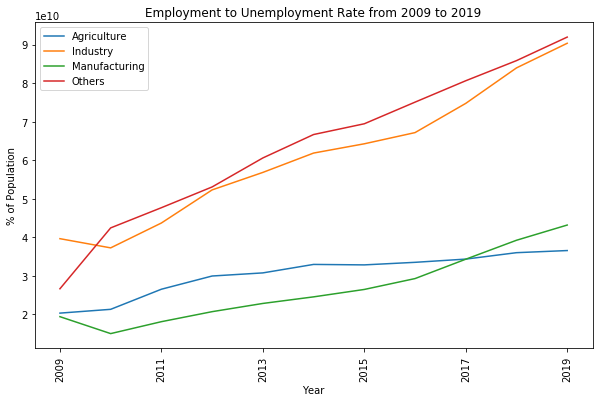

In [334]:
ind = industry.loc[['Agriculture','Industry','Manufacturing','Others'],years]
ind.transpose().plot(kind='line', figsize=(10, 6), rot=90)
plt.xlabel('Year')
plt.ylabel('% of Population')
plt.title('Employment to Unemployment Rate from 2009 to 2019')

plt.show()

In [335]:
industry_split=industry.loc[['Agriculture_%GDP','Industry_%GDP','Manufacturing_%GDP','Others_%GDP']]
industry_split

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Agriculture_%GDP,19.2,20.1,25.0,28.3,29.0,31.1,31.0,31.6,32.4,34.0,34.5,34.5
Industry_%GDP,37.4,35.1,41.2,49.3,53.6,58.3,60.6,63.4,70.5,79.2,85.2,85.2
Manufacturing_%GDP,18.3,14.2,17.1,19.5,21.5,23.2,25.0,27.6,32.4,37.0,40.7,40.7
Others_%GDP,25.1,40.0,45.0,50.1,57.2,62.9,65.5,70.8,76.0,81.0,86.7,86.7


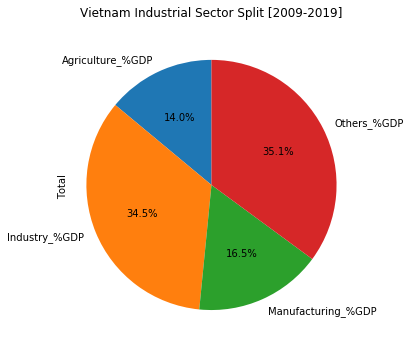

In [336]:
# autopct create %, start angle represent starting point
industry_split['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=False,       # add shadow  
                            )
plt.title('Vietnam Industrial Sector Split [2009-2019]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

**4. POPULATION STRUCTURE**

In [337]:
pop = pd.read_csv("https://raw.githubusercontent.com/quitribo/CAPSTONE/master/population.csv")
pop.set_index('indicators', inplace=True)
pop.index.name = None

pop.head(11)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Population_ages_0-14_%,24.1,23.6,23.3,23.1,23.0,23.0,23.0,23.0,23.1,23.2,23.2
Population_ages_0-14_total,21007587.0,20784261.0,20727595.0,20773379.0,20914435.0,21114069.0,21343372.0,21571523.0,21849508.0,22139267.0,22392547.0
Population_ages_15-64_%,69.4,69.9,70.2,70.4,70.5,70.4,70.3,70.1,69.9,69.6,69.2
Population_ages_15-64_total,60419839.0,61474294.0,62383848.0,63212277.0,63946323.0,64593718.0,65162932.0,65676647.0,66096018.0,66450585.0,66783127.0
Population_ages_65+_%,6.5,6.5,6.5,6.5,6.5,6.5,6.7,6.8,7.0,7.3,7.6
Population_ages_65+_total,5664826.0,5709096.0,5760118.0,5816831.0,5892714.0,6006808.0,6170772.0,6390554.0,6651116.0,6950543.0,7286432.0
Population_total,87092252.0,87967651.0,88871561.0,89802487.0,90753472.0,91714595.0,92677076.0,93638724.0,94596642.0,95540395.0,96462106.0
Rural_population,61171856.0,61210531.0,61250280.0,61288401.0,61323029.0,61343307.0,61343883.0,61324000.0,61286326.0,61223241.0,61129966.0
Rural_population_%,70.2,69.6,68.9,68.2,67.6,66.9,66.2,65.5,64.8,64.1,63.4
Urban_population,25920396.0,26757120.0,27621281.0,28514086.0,29430443.0,30371288.0,31333193.0,32314724.0,33310316.0,34317154.0,35332140.0


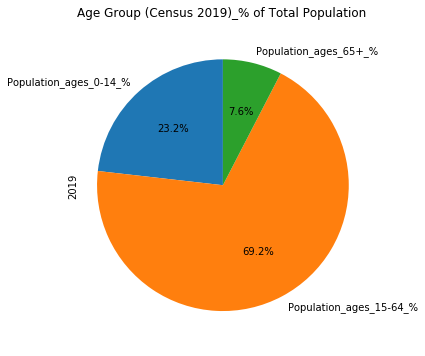

In [338]:
pop_age_split=pop.loc[['Population_ages_0-14_%','Population_ages_15-64_%','Population_ages_65+_%']]
pop_age_split['2019'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=False,       # add shadow  
                            )
plt.title('Age Group (Census 2019)_% of Total Population')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

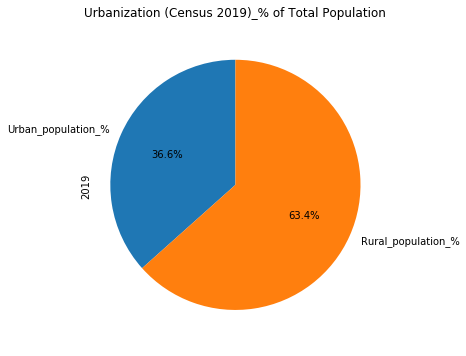

In [339]:
urban_rural=pop.loc[['Urban_population_%','Rural_population_%']]
urban_rural['2019'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=False,       # add shadow  
                            )
plt.title('Urbanization (Census 2019)_% of Total Population')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

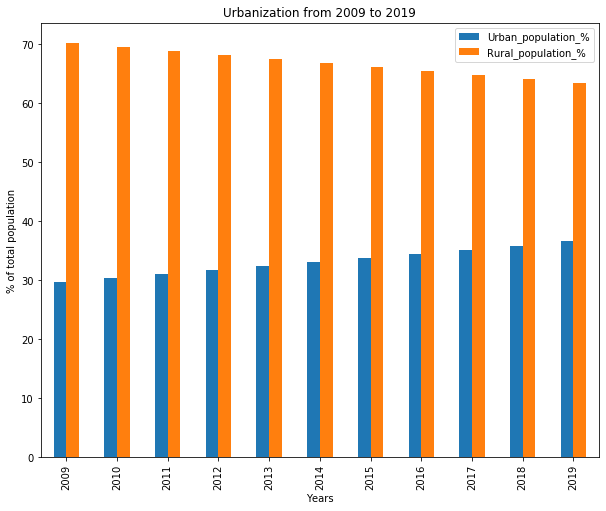

In [340]:
urban_rural.transpose().plot(kind='bar', figsize = (10,8), rot=90)
plt.xlabel('Years')
plt.ylabel('% of total population')
plt.title('Urbanization from 2009 to 2019')

plt.show()

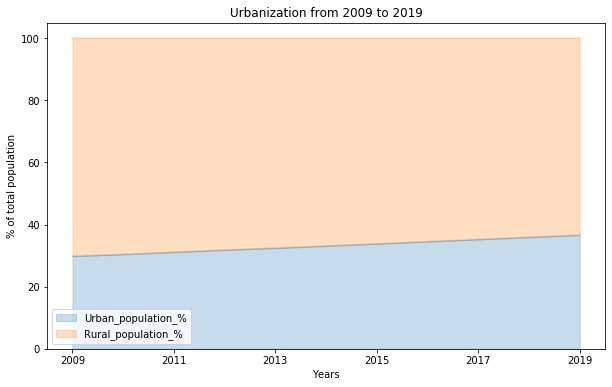

In [341]:
urban_rural.transpose().plot(kind='area', 
             alpha=0.25,
             stacked=True,
             figsize=(10, 6),
            )

plt.title('Urbanization from 2009 to 2019')
plt.ylabel('% of total population')
plt.xlabel('Years')

plt.show()

## PART 3 - MODELLING

### Choosing the right variables for Regression Model

In [342]:
df = pd.concat([emp.loc[['Employment_to_population_ratio_15-24_total_%']],industry.loc[['Manufacturing_%GDP']],pop.loc[['Urban_population_%']],pop.loc[['Population_total']],monpol.loc[['Profit_tax']],monpol.loc[['Inflation']],emp.loc[['Labor_force_total']],gdp_bil])
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Employment_to_population_ratio_15-24_total_%,56.7,56.1,54.4,52.9,54.6,54.6,55.0,52.6,52.3,52.5,50.2,NaN
Manufacturing_%GDP,18.3,14.2,17.1,19.5,21.5,23.2,25.0,27.6,32.4,37.0,40.7,40.7
Urban_population_%,29.8,30.4,31.1,31.8,32.4,33.1,33.8,34.5,35.2,35.9,36.6,NaN
Population_total,87092252.0,87967651.0,88871561.0,89802487.0,90753472.0,91714595.0,92677076.0,93638724.0,94596642.0,95540395.0,96462106.0,NaN
Profit_tax,21.0,12.0,17.0,12.0,17.0,17.0,14.0,14.0,13.0,13.0,13.0,NaN
Inflation,7.0,9.0,19.0,9.0,7.0,4.0,1.0,3.0,4.0,4.0,3.0,NaN
Labor_force_total,50213112.0,51254209.0,52620771.0,53347074.0,54667903.0,55355047.0,55760129.0,55991171.0,56565992.0,56915235.0,57364650.0,NaN
GDP,106.0,116.0,136.0,156.0,171.0,186.0,193.0,205.0,224.0,245.0,262.0,NaN


In [343]:
df.drop(['Total'],axis=1,inplace=True)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Employment_to_population_ratio_15-24_total_%,56.7,56.1,54.4,52.9,54.6,54.6,55.0,52.6,52.3,52.5,50.2
Manufacturing_%GDP,18.3,14.2,17.1,19.5,21.5,23.2,25.0,27.6,32.4,37.0,40.7
Urban_population_%,29.8,30.4,31.1,31.8,32.4,33.1,33.8,34.5,35.2,35.9,36.6
Population_total,87092252.0,87967651.0,88871561.0,89802487.0,90753472.0,91714595.0,92677076.0,93638724.0,94596642.0,95540395.0,96462106.0
Profit_tax,21.0,12.0,17.0,12.0,17.0,17.0,14.0,14.0,13.0,13.0,13.0
Inflation,7.0,9.0,19.0,9.0,7.0,4.0,1.0,3.0,4.0,4.0,3.0
Labor_force_total,50213112.0,51254209.0,52620771.0,53347074.0,54667903.0,55355047.0,55760129.0,55991171.0,56565992.0,56915235.0,57364650.0
GDP,106.0,116.0,136.0,156.0,171.0,186.0,193.0,205.0,224.0,245.0,262.0


In [344]:
df2=df.transpose()
df2.rename(columns={"Employment_to_population_ratio_15-24_total_%": "employment", "Manufacturing_%GDP":"manufacturing","Population_total": "population","Urban_population_%":"urban","Profit_tax":"tax","Inflation":"inflation","Labor_force_total":"labor"},inplace=True)
df2

,employment,manufacturing,urban,population,tax,inflation,labor,GDP
2009,56.7,18.3,29.8,87092252.0,21.0,7.0,50213112.0,106.0
2010,56.1,14.2,30.4,87967651.0,12.0,9.0,51254209.0,116.0
2011,54.4,17.1,31.1,88871561.0,17.0,19.0,52620771.0,136.0
2012,52.9,19.5,31.8,89802487.0,12.0,9.0,53347074.0,156.0
2013,54.6,21.5,32.4,90753472.0,17.0,7.0,54667903.0,171.0
2014,54.6,23.2,33.1,91714595.0,17.0,4.0,55355047.0,186.0
2015,55.0,25.0,33.8,92677076.0,14.0,1.0,55760129.0,193.0
2016,52.6,27.6,34.5,93638724.0,14.0,3.0,55991171.0,205.0
2017,52.3,32.4,35.2,94596642.0,13.0,4.0,56565992.0,224.0
2018,52.5,37.0,35.9,95540395.0,13.0,4.0,56915235.0,245.0


In [345]:
df2.corr()

,employment,manufacturing,urban,population,tax,inflation,labor,GDP
employment,1.000000,-0.836337,-0.852721,-0.847279,0.568662,0.300624,-0.798199,-0.860602
manufacturing,-0.836337,1.000000,0.958256,0.956331,-0.376416,-0.603472,0.870189,0.959355
urban,-0.852721,0.958256,1.000000,0.999914,-0.500856,-0.629250,0.967201,0.996360
population,-0.847279,0.956331,0.999914,1.000000,-0.498935,-0.634157,0.968728,0.995971
tax,0.568662,-0.376416,-0.500856,-0.498935,1.000000,0.249872,-0.470277,-0.481222
inflation,0.300624,-0.603472,-0.629250,-0.634157,0.249872,1.000000,-0.614273,-0.616010
labor,-0.798199,0.870189,0.967201,0.968728,-0.470277,-0.614273,1.000000,0.970806
GDP,-0.860602,0.959355,0.996360,0.995971,-0.481222,-0.616010,0.970806,1.000000


**'manufacturing', 'urban', 'population' and 'tax' show strong relationship with GDP**

### MULTIPLE LINEAR REGRESSION

In [346]:
msk = np.random.rand(len(df2)) < 0.6
train = df2[msk]
test = df2[~msk]

In [347]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['manufacturing','urban','tax','labor']])
y = np.asanyarray(train[['GDP']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.09924925e-11  2.65394770e-11 -1.89567693e-10  2.75367168e-05]]


In [316]:
y_hat= regr.predict(test[['manufacturing','urban','tax','labor']])
x = np.asanyarray(test[['manufacturing','urban','tax','labor']])
y = np.asanyarray(test[['GDP']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Residual sum of squares: 340.89
Variance score: 0.74
Mean absolute error: 6.09
Residual sum of squares (MSE): 53.32
R2-score: 0.94


**High R2-score proves 'manufacturing', 'urban', 'population' and 'tax' could be use as the basis of model**